<a href="https://colab.research.google.com/github/GDharan10/Project10_RetailAndWarehouseSalesAnalysis/blob/main/RetailAndWarehouseSalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data collection**

In [21]:
df = pd.read_csv("/content/drive/MyDrive/Task/Retail and Warehouse Sales Analysis/Warehouse_and_Retail_Sales.csv")

# **Data Preprocessing**

In [22]:
df.head(2)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.0,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.0,1.0,4.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [24]:
df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [25]:
df.dropna(inplace=True)

In [26]:
df.duplicated().sum()

0

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,307477.0,2018.438238,1.083080,2017.00,2017.0,2019.00,2019.00,2020.00
MONTH,307477.0,6.424064,3.461853,1.00,3.0,7.00,9.00,12.00
RETAIL SALES,307477.0,7.003644,30.387012,-6.49,0.0,0.32,3.26,1816.49
RETAIL TRANSFERS,307477.0,6.938177,30.244239,-38.49,0.0,0.00,3.00,1990.83
WAREHOUSE SALES,307477.0,25.375561,249.500572,-4996.00,0.0,1.00,5.00,18317.00


In [28]:
df.describe(include=['object']).T

,count,unique,top,freq
SUPPLIER,307477,396,REPUBLIC NATIONAL DISTRIBUTING CO,20994
ITEM CODE,307477,34039,327647,24
ITEM DESCRIPTION,307477,34805,BURGANS ALBARINO - 750ML,44
ITEM TYPE,307477,8,WINE,187640


In [30]:
# Clean data and convert 'YEAR' and 'MONTH' to datetime
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['MONTH'] = pd.to_numeric(df['MONTH'], errors='coerce')
df.dropna(subset=['YEAR', 'MONTH'], inplace=True)
df['DATE'] = pd.to_datetime(df['YEAR'].astype(int).astype(str) + '-' + df['MONTH'].astype(int).astype(str), format='%Y-%m')

# **1. Temporal Sales Analysis:**

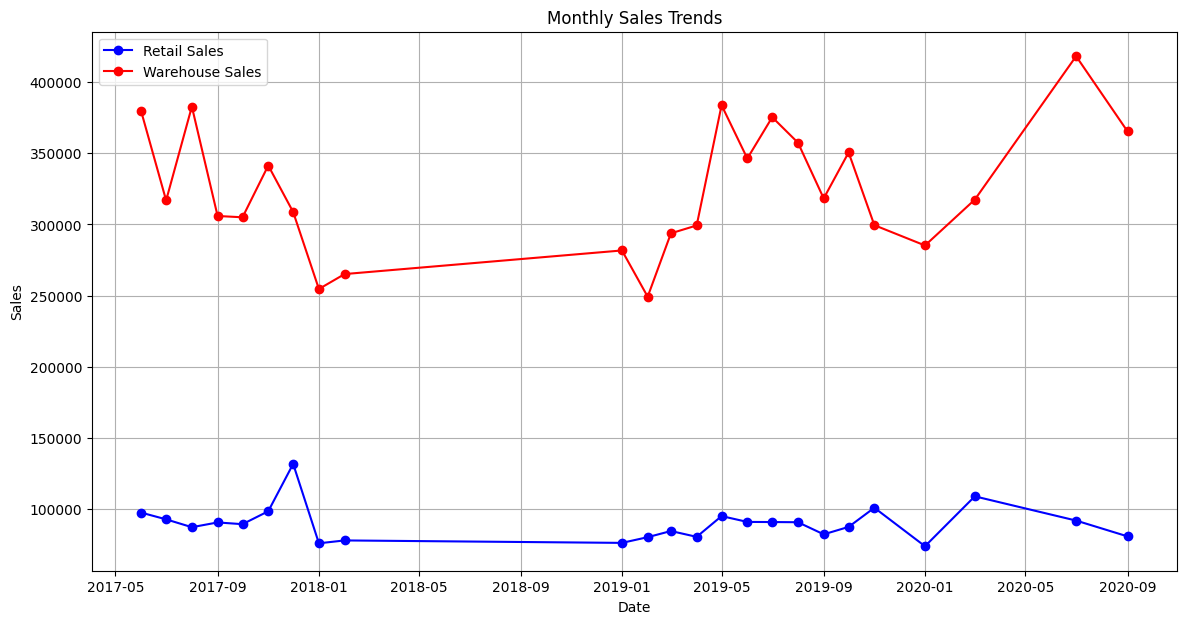

In [32]:
# Group by year and month, and sum the sales
monthly_sales = df.groupby(['DATE'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum()

# Plotting sales trends over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales['RETAIL SALES'], marker='o', linestyle='-', color='b', label='Retail Sales')
plt.plot(monthly_sales.index, monthly_sales['WAREHOUSE SALES'], marker='o', linestyle='-', color='r', label='Warehouse Sales')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


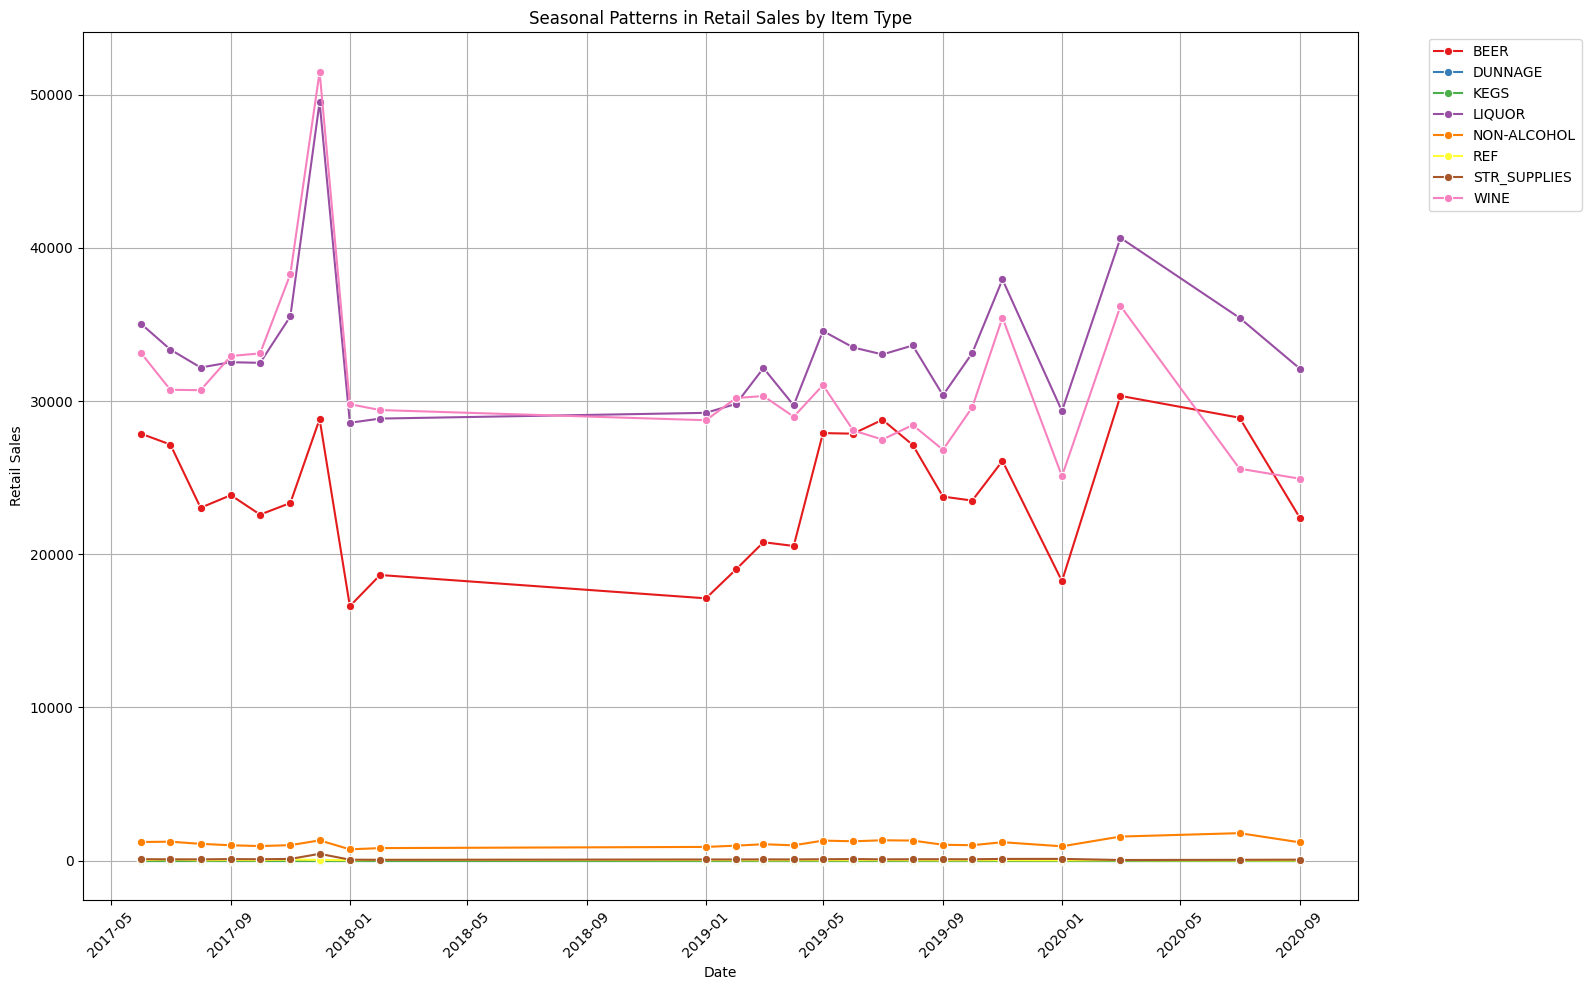

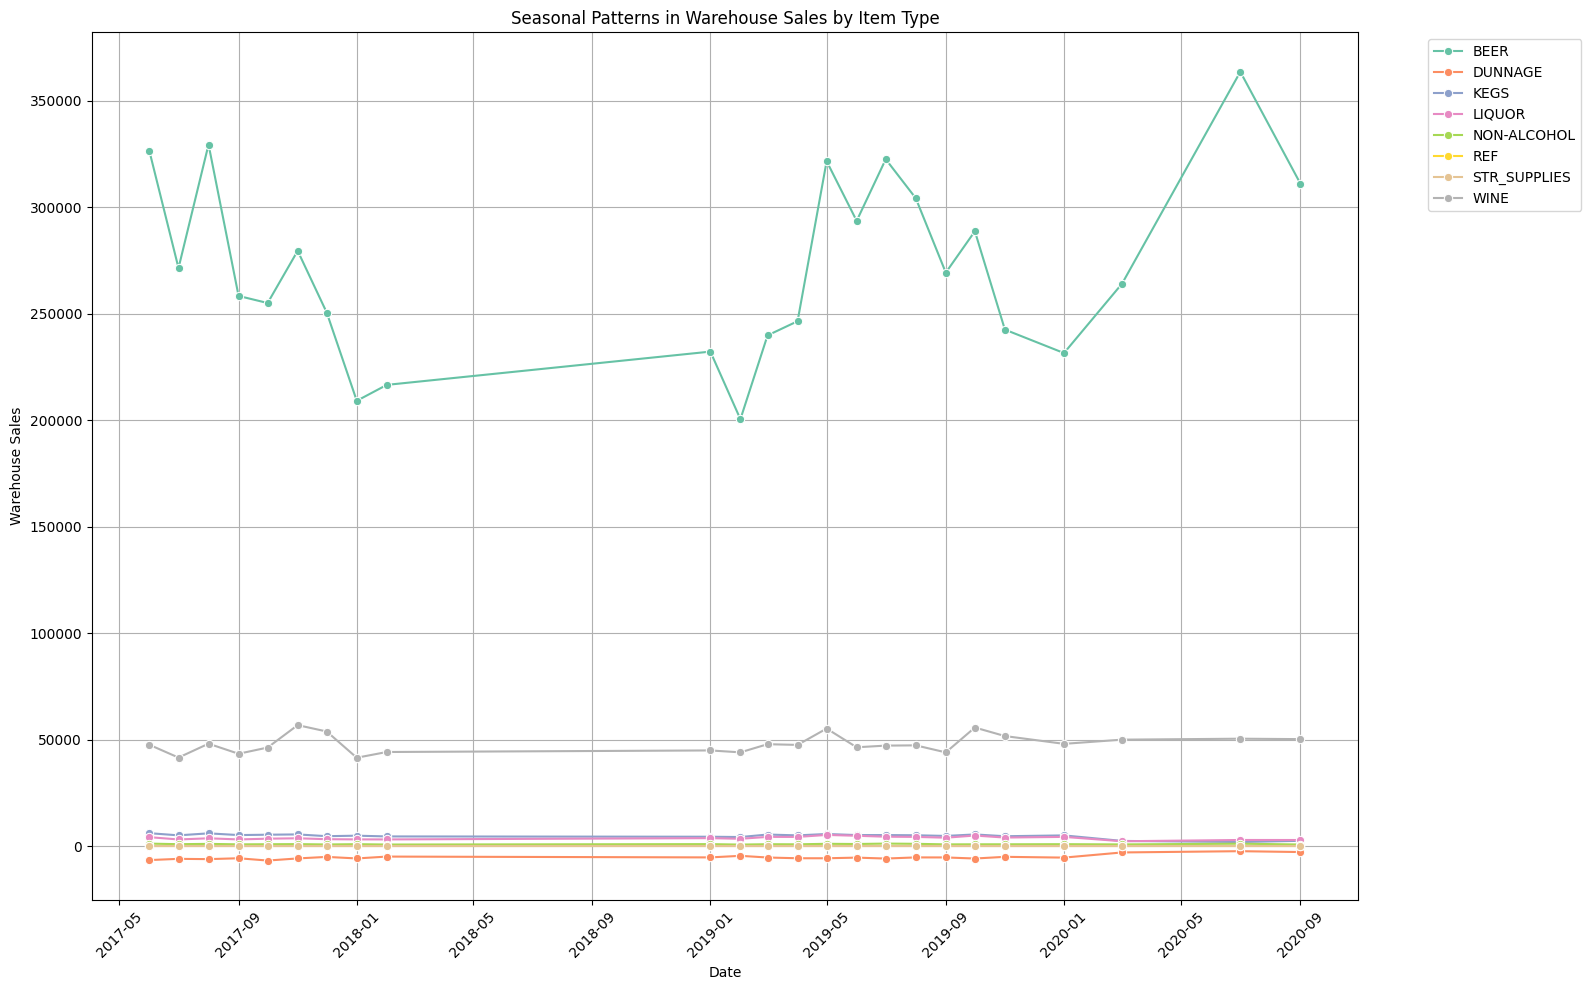

In [33]:
# Group by item type and month, and sum the sales
monthly_sales_by_type = df.groupby(['ITEM TYPE', 'DATE'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

# Plotting seasonal patterns by item type
plt.figure(figsize=(16, 10))
sns.lineplot(x='DATE', y='RETAIL SALES', hue='ITEM TYPE', data=monthly_sales_by_type, marker='o', palette='Set1')
plt.title('Seasonal Patterns in Retail Sales by Item Type')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))
sns.lineplot(x='DATE', y='WAREHOUSE SALES', hue='ITEM TYPE', data=monthly_sales_by_type, marker='o', palette='Set2')
plt.title('Seasonal Patterns in Warehouse Sales by Item Type')
plt.xlabel('Date')
plt.ylabel('Warehouse Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# **2. Supplier Performance Analysis:**

In [34]:
# Group by supplier and sum the sales
supplier_sales = df.groupby('SUPPLIER')[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()
# Calculate total sales (retail + warehouse)
supplier_sales['TOTAL SALES'] = supplier_sales['RETAIL SALES'] + supplier_sales['WAREHOUSE SALES']

In [35]:
# Calculate average total sales
average_sales = supplier_sales['TOTAL SALES'].mean()  # Using mean as average
# Define thresholds for categorization
threshold_high = average_sales * 2  # Top-performing threshold (e.g., 50% above average)
threshold_low = average_sales * 0.5   # Underperforming threshold (e.g., 50% below average)
# Function to categorize suppliers based on total sales
def categorize_supplier(sales):
    if sales >= threshold_high:
        return 'Top-performing suppliers'
    elif sales <= threshold_low:
        return 'Underperforming suppliers'
    else:
        return 'Average-performing suppliers'

# Apply categorization function to create 'SUPPLIER_TYPE' column
supplier_sales['SUPPLIER_TYPE'] = supplier_sales['TOTAL SALES'].apply(categorize_supplier)

In [36]:
# Sort suppliers by total sales
supplier_sales_sorted = supplier_sales.sort_values(by='TOTAL SALES', ascending=False)

# Select top 10 and bottom 10 suppliers
top_10 = supplier_sales_sorted.head(10)
bottom_10 = supplier_sales_sorted.tail(10)

<ipython-input-37-015518665715>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




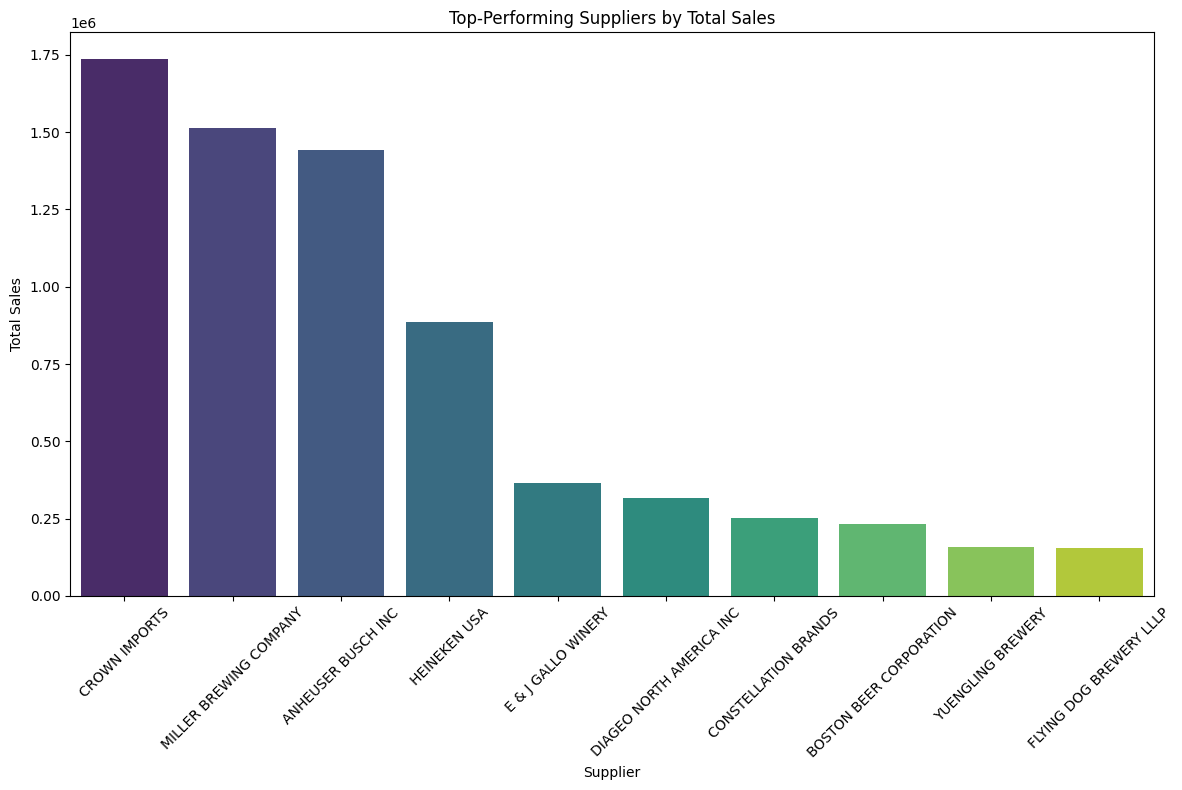

In [37]:
# Plotting top-performing suppliers (Top 10)
plt.figure(figsize=(12, 8))
sns.barplot(x='SUPPLIER', y='TOTAL SALES', data=top_10, palette='viridis')
plt.title('Top-Performing Suppliers by Total Sales')
plt.xlabel('Supplier')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-38-bba4a685f4f9>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




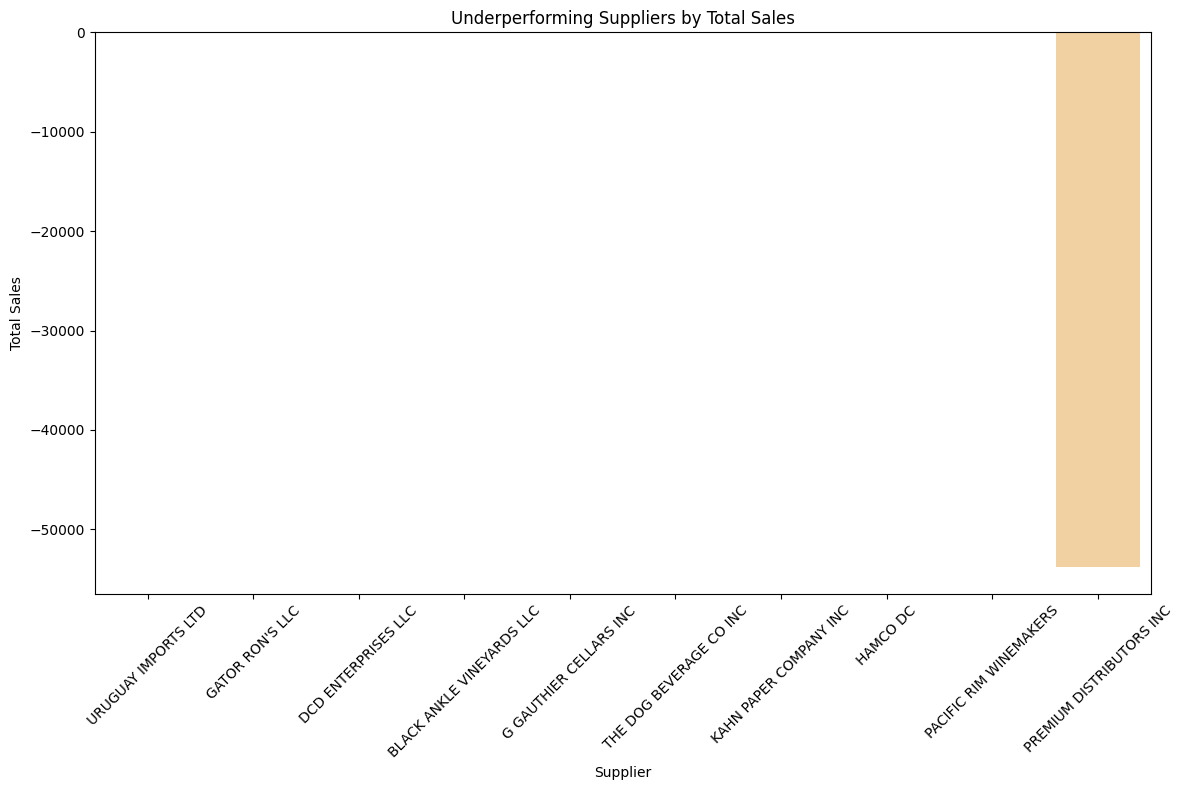

In [38]:
# Plotting underperforming suppliers (Bottom 10)
plt.figure(figsize=(12, 8))
sns.barplot(x='SUPPLIER', y='TOTAL SALES', data=bottom_10, palette='magma')
plt.title('Underperforming Suppliers by Total Sales')
plt.xlabel('Supplier')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-39-4fcf06d30de4>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-39-4fcf06d30de4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




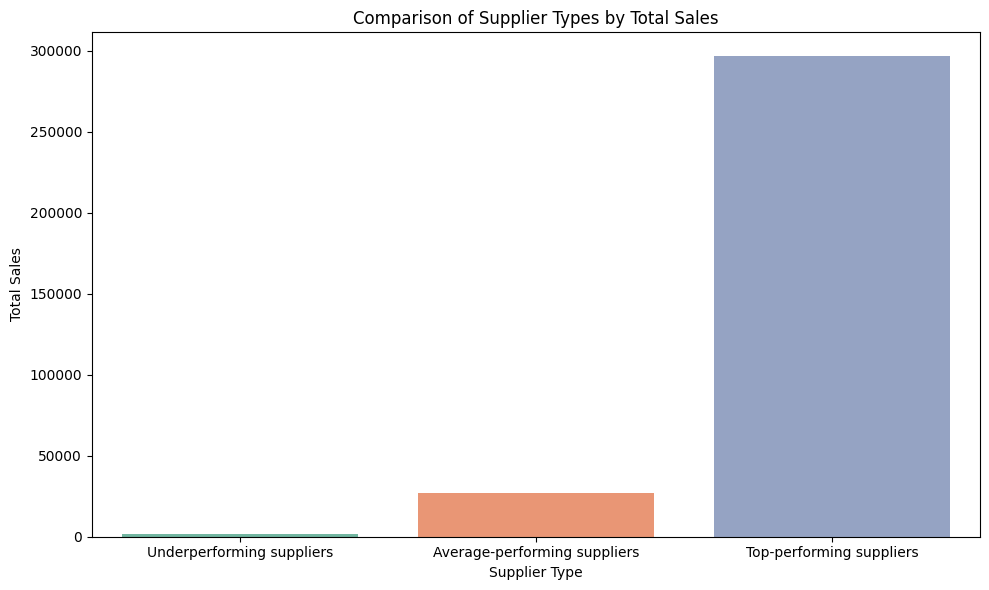

In [39]:
# Plotting top-performing vs average-performing vs underperforming suppliers
plt.figure(figsize=(10, 6))
sns.barplot(x='SUPPLIER_TYPE', y='TOTAL SALES', data=supplier_sales, palette='Set2', ci=None)
plt.title('Comparison of Supplier Types by Total Sales')
plt.xlabel('Supplier Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **3. Item Type Analysis:**

In [40]:
# Group by item type and sum the sales
item_sales = df.groupby('ITEM TYPE')[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

# Calculate total sales (retail + warehouse)
item_sales['TOTAL SALES'] = item_sales['RETAIL SALES'] + item_sales['WAREHOUSE SALES']

In [41]:
# Sort item types by total sales
item_sales_sorted = item_sales.sort_values(by='TOTAL SALES', ascending=False)

# Identify the most popular item type
most_popular_item_type = item_sales_sorted.iloc[0]

# Identify the least popular item type
least_popular_item_type = item_sales_sorted.iloc[-1]

print("Most Popular Item Type:")
print(most_popular_item_type)

print("\nLeast Popular Item Type:")
print(least_popular_item_type)

Most Popular Item Type:
ITEM TYPE                BEER
RETAIL SALES        574220.53
WAREHOUSE SALES    6527236.51
TOTAL SALES        7101457.04
Name: 0, dtype: object

Least Popular Item Type:
ITEM TYPE           DUNNAGE
RETAIL SALES            0.0
WAREHOUSE SALES   -121307.0
TOTAL SALES       -121307.0
Name: 1, dtype: object


<ipython-input-42-8d5dda267370>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




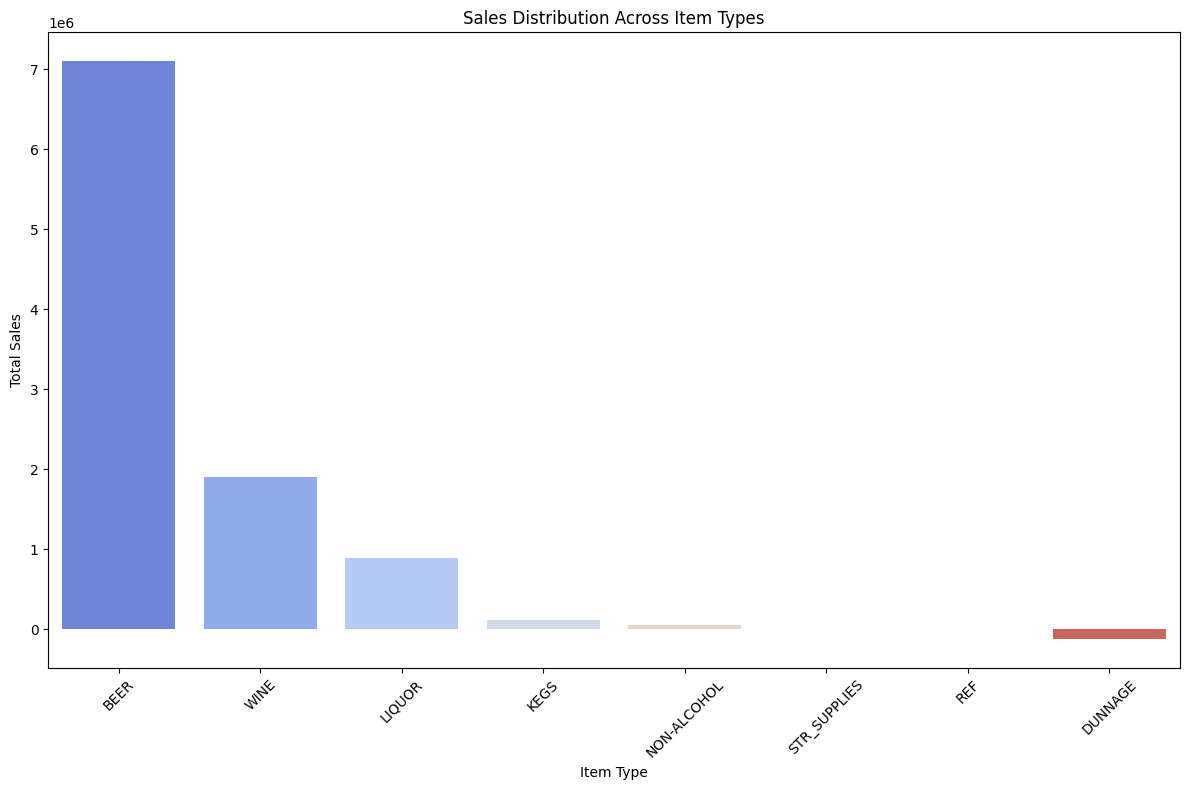

In [42]:
# Plotting sales distribution across item types
plt.figure(figsize=(12, 8))
sns.barplot(x='ITEM TYPE', y='TOTAL SALES', data=item_sales_sorted, palette='coolwarm')
plt.title('Sales Distribution Across Item Types')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **4. Item-Specific Sales Analysis:**

In [43]:
# Group by item description, item code, and item type, then sum the sales
item_sales = df.groupby(['ITEM DESCRIPTION', 'ITEM TYPE'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

In [44]:
# Sort items by retail sales and reset index
top_retail_sales = item_sales.sort_values(by='RETAIL SALES', ascending=False).head(10).reset_index(drop=True)
least_retail_sales = item_sales.sort_values(by='RETAIL SALES', ascending=True).head(10).reset_index(drop=True)

# Sort items by warehouse sales and reset index
top_warehouse_sales = item_sales.sort_values(by='WAREHOUSE SALES', ascending=False).head(10).reset_index(drop=True)
least_warehouse_sales = item_sales.sort_values(by='WAREHOUSE SALES', ascending=True).head(10).reset_index(drop=True)

# Display top and least selling items
print("Top 10 Selling Items in Retail Sales:")
print(top_retail_sales[['ITEM DESCRIPTION', 'ITEM TYPE', 'RETAIL SALES']])

print("\nLeast 10 Selling Items in Retail Sales:")
print(least_retail_sales[['ITEM DESCRIPTION', 'ITEM TYPE', 'RETAIL SALES']])

print("\nTop 10 Selling Items in Warehouse Sales:")
print(top_warehouse_sales[['ITEM DESCRIPTION', 'ITEM TYPE', 'WAREHOUSE SALES']])

print("\nLeast 10 Selling Items in Warehouse Sales:")
print(least_warehouse_sales[['ITEM DESCRIPTION', 'ITEM TYPE', 'WAREHOUSE SALES']])

Top 10 Selling Items in Retail Sales:
                            ITEM DESCRIPTION ITEM TYPE  RETAIL SALES
0              TITO'S HANDMADE VODKA - 1.75L    LIQUOR      27580.50
1               CORONA EXTRA LOOSE NR - 12OZ      BEER      25064.00
2                   HEINEKEN LOOSE NR - 12OZ      BEER      17761.00
3                MILLER LITE 30PK CAN - 12OZ      BEER      14440.00
4                         BUD LIGHT 30PK CAN      BEER      12299.00
5                     BOWMAN'S VODKA - 1.75L    LIQUOR      12126.72
6  MILLER LITE  HIGH GRAPHIC LOOSE NR - 12OZ      BEER      10373.77
7            STELLA ARTOIS LOOSE NR - 11.2OZ      BEER      10354.00
8                CORONA EXTRA 2/12 NR - 12OZ      BEER       9755.19
9                     PINNACLE VODKA - 1.75L    LIQUOR       8676.40

Least 10 Selling Items in Retail Sales:
                               ITEM DESCRIPTION ITEM TYPE  RETAIL SALES
0  MARCHESI DI BAROLO BAROLO      31343 - 750ML      WINE         -0.25
1                 

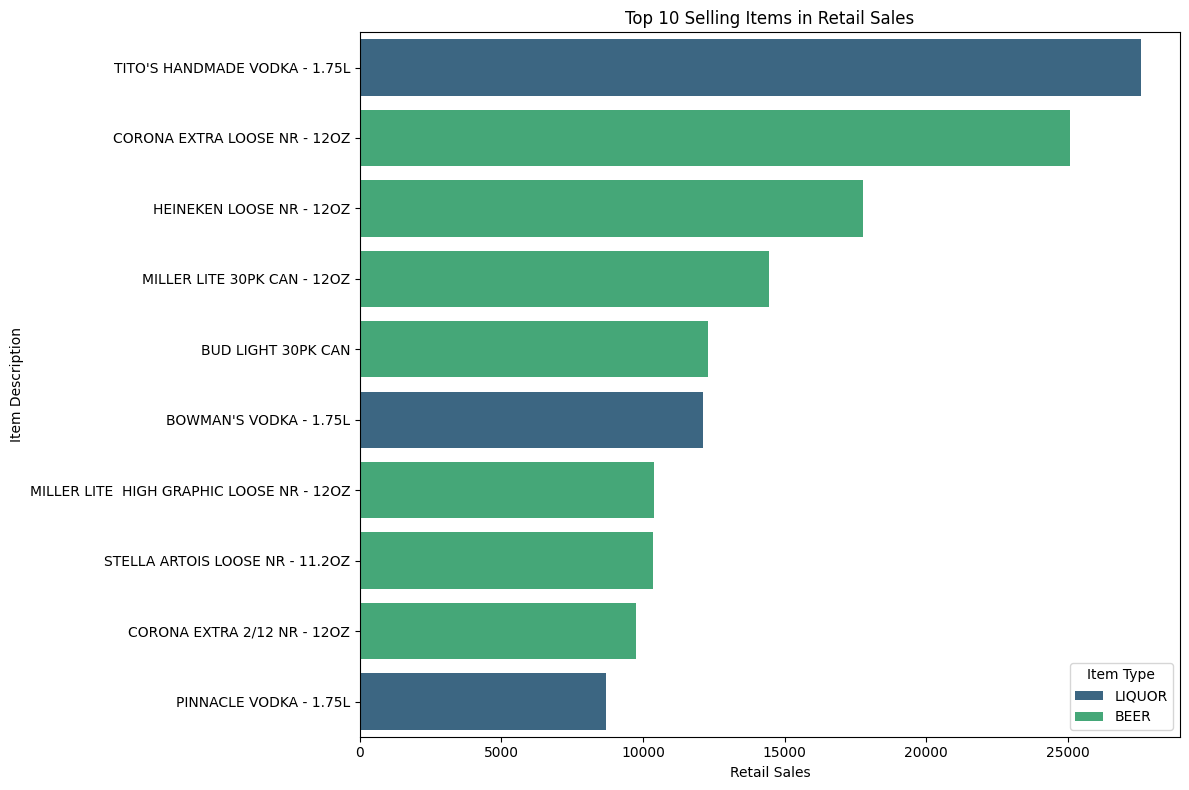

In [45]:
# Plotting top-selling items in retail sales
plt.figure(figsize=(12, 8))
sns.barplot(x='RETAIL SALES', y='ITEM DESCRIPTION', hue='ITEM TYPE', data=top_retail_sales, palette='viridis')
plt.title('Top 10 Selling Items in Retail Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Item Description')
plt.legend(title='Item Type')
plt.tight_layout()
plt.show()


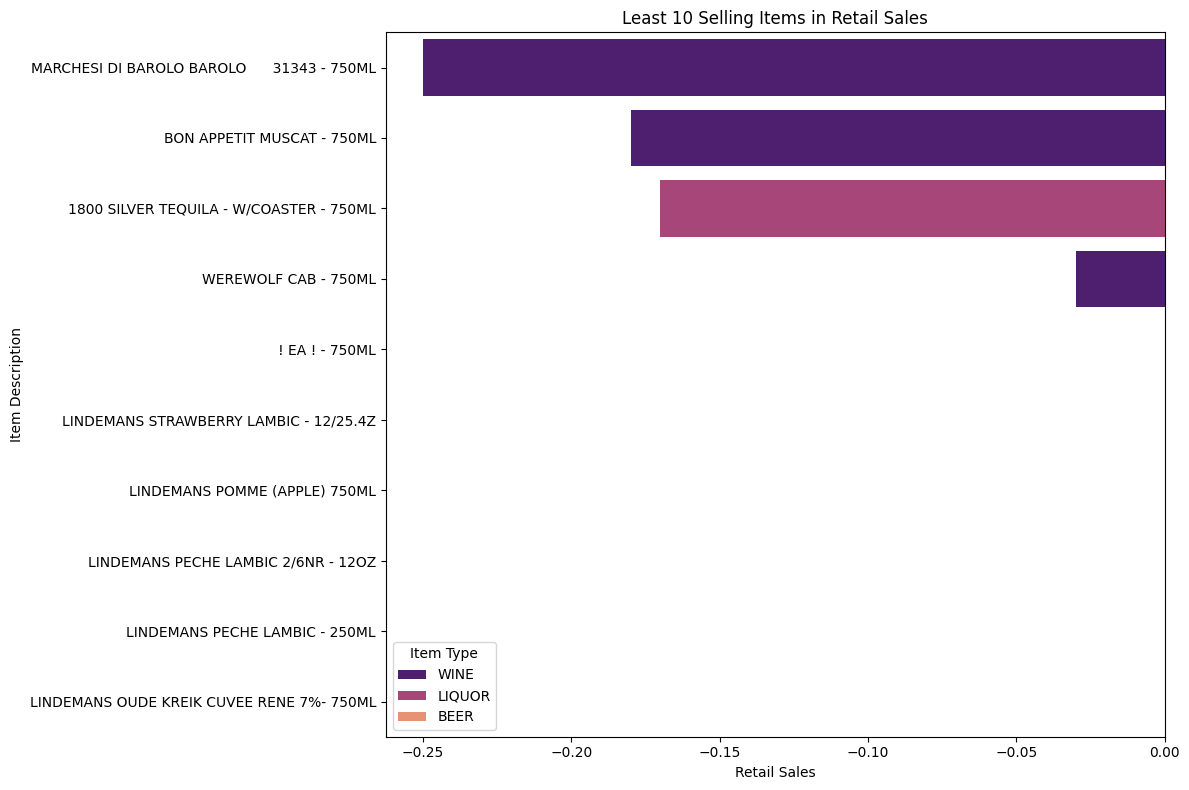

In [46]:
# Plotting least-selling items in retail sales
plt.figure(figsize=(12, 8))
sns.barplot(x='RETAIL SALES', y='ITEM DESCRIPTION', hue='ITEM TYPE', data=least_retail_sales, palette='magma')
plt.title('Least 10 Selling Items in Retail Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Item Description')
plt.legend(title='Item Type')
plt.tight_layout()
plt.show()

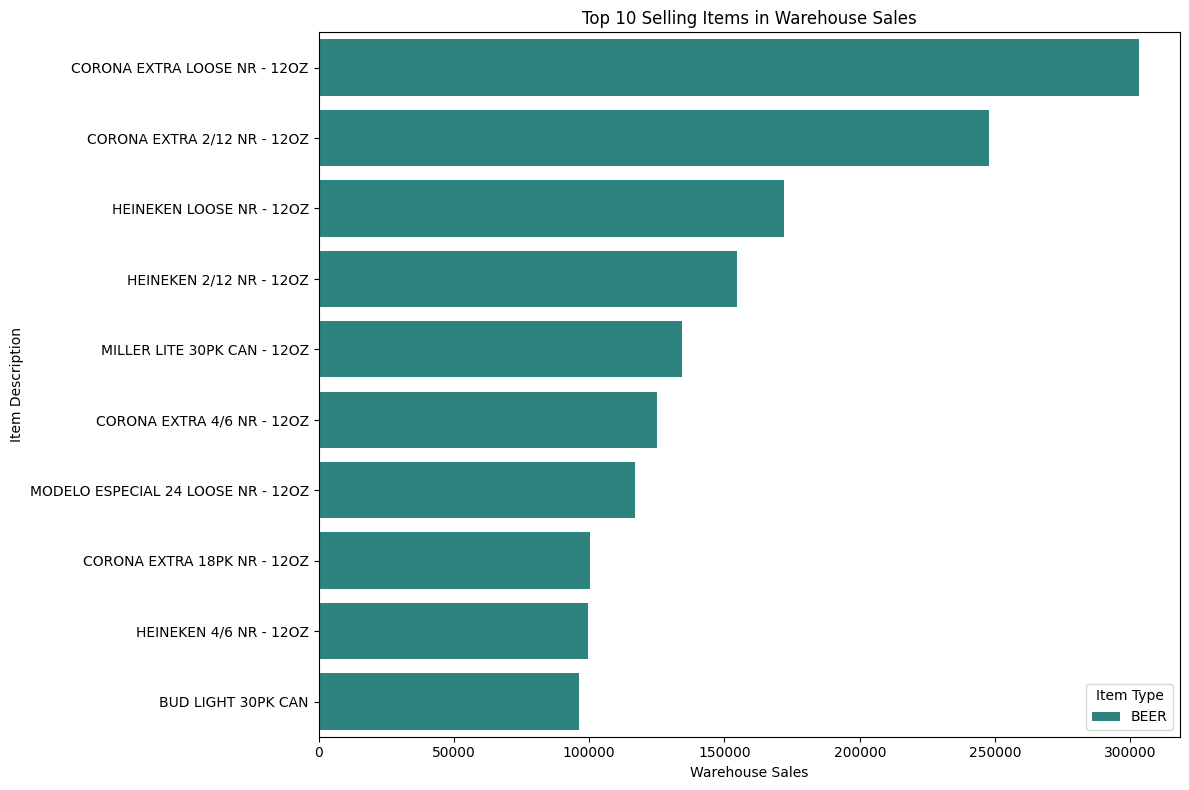

In [47]:
# Plotting top-selling items in warehouse sales
plt.figure(figsize=(12, 8))
sns.barplot(x='WAREHOUSE SALES', y='ITEM DESCRIPTION', hue='ITEM TYPE', data=top_warehouse_sales, palette='viridis')
plt.title('Top 10 Selling Items in Warehouse Sales')
plt.xlabel('Warehouse Sales')
plt.ylabel('Item Description')
plt.legend(title='Item Type')
plt.tight_layout()
plt.show()


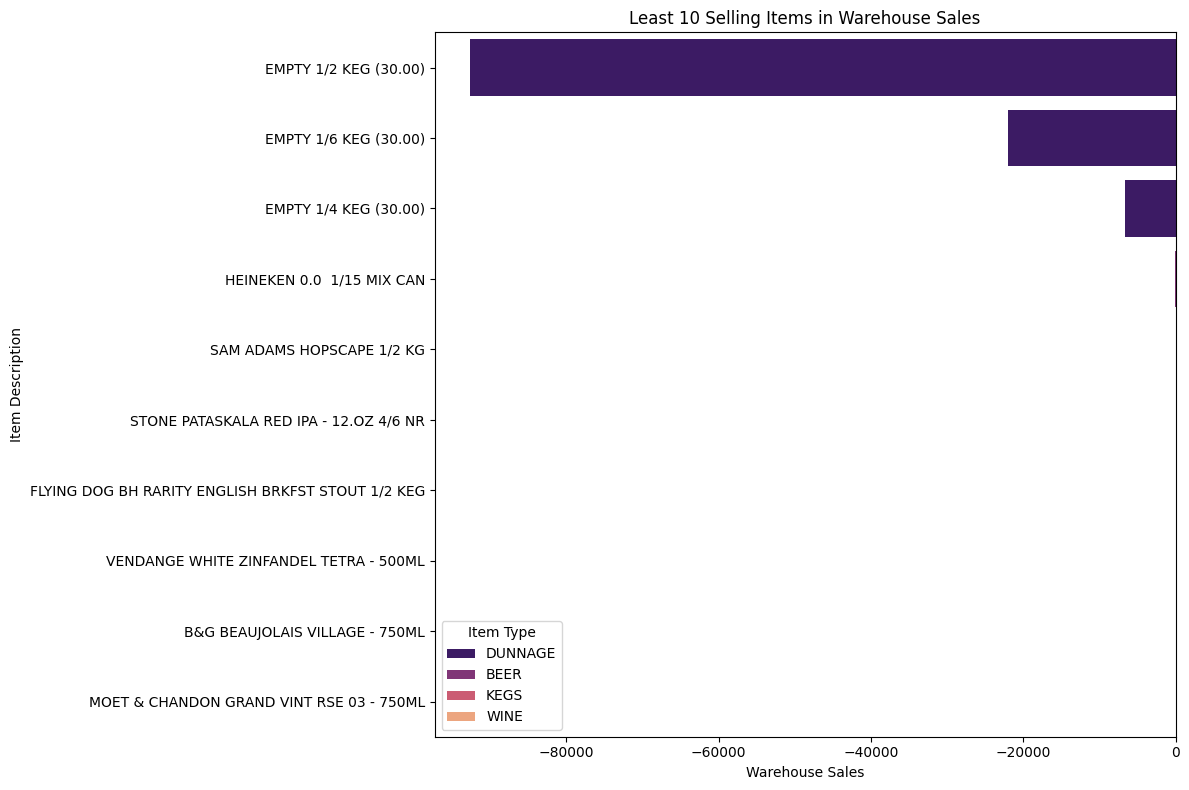

In [48]:
# Plotting least-selling items in warehouse sales
plt.figure(figsize=(12, 8))
sns.barplot(x='WAREHOUSE SALES', y='ITEM DESCRIPTION', hue='ITEM TYPE', data=least_warehouse_sales, palette='magma')
plt.title('Least 10 Selling Items in Warehouse Sales')
plt.xlabel('Warehouse Sales')
plt.ylabel('Item Description')
plt.legend(title='Item Type')
plt.tight_layout()
plt.show()

# **5. Retail vs. Warehouse Sales Comparison:**

In [49]:
# Group by item description, item code, item type, and supplier, then sum the sales
item_supplier_sales = df.groupby(['ITEM DESCRIPTION', 'ITEM CODE', 'ITEM TYPE', 'SUPPLIER'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

# Calculate the difference between retail sales and warehouse sales
item_supplier_sales['SALES DIFFERENCE'] = item_supplier_sales['RETAIL SALES'] - item_supplier_sales['WAREHOUSE SALES']


In [50]:
# Define a threshold for significant difference
threshold = item_supplier_sales['SALES DIFFERENCE'].std() * 2  # Example: 2 standard deviations from the mean

# Identify items and suppliers with significant differences in sales
significant_diff = item_supplier_sales[abs(item_supplier_sales['SALES DIFFERENCE']) >= threshold].reset_index(drop=True)

# Display items and suppliers with significant sales differences
print("Items and Suppliers with Significant Sales Differences:")
print(significant_diff[['ITEM DESCRIPTION', 'ITEM TYPE', 'SUPPLIER', 'RETAIL SALES', 'WAREHOUSE SALES', 'SALES DIFFERENCE']])


Items and Suppliers with Significant Sales Differences:
                     ITEM DESCRIPTION ITEM TYPE                 SUPPLIER  \
0         AMSTEL LIGHT 2/12 NR - 12OZ      BEER             HEINEKEN USA   
1          AMSTEL LIGHT 4/6 NR - 12OZ      BEER             HEINEKEN USA   
2        AMSTEL LIGHT LOOSE NR - 12OZ      BEER             HEINEKEN USA   
3    ANGRY ORCHARD CRISP APPLE 4/6 NR      BEER  BOSTON BEER CORPORATION   
4                BECKS 2/12 NR - 12OZ      BEER       ANHEUSER BUSCH INC   
..                                ...       ...                      ...   
181              YUENGLING LAGER 1/2K      KEGS        YUENGLING BREWERY   
182   YUENGLING LAGER 2/12 CAN - 12OZ      BEER        YUENGLING BREWERY   
183    YUENGLING LAGER 2/12 NR - 12OZ      BEER        YUENGLING BREWERY   
184     YUENGLING LAGER 4/6 NR - 12OZ      BEER        YUENGLING BREWERY   
185  YUENGLING LAGER LOOSE CAN - 12OZ      BEER        YUENGLING BREWERY   

     RETAIL SALES  WAREHOUSE SA

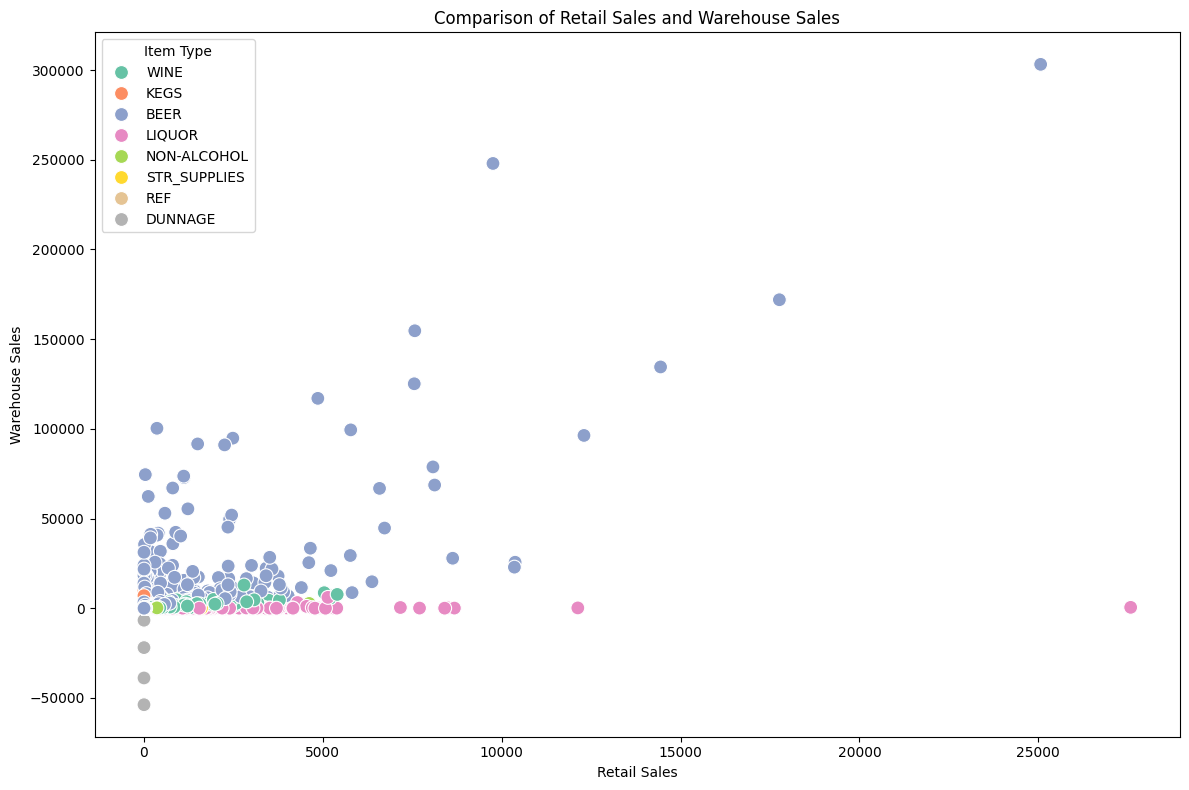

In [51]:
# Scatter plot to compare retail sales and warehouse sales
plt.figure(figsize=(12, 8))
sns.scatterplot(data=item_supplier_sales, x='RETAIL SALES', y='WAREHOUSE SALES', hue='ITEM TYPE', palette='Set2', s=100)
plt.title('Comparison of Retail Sales and Warehouse Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.legend(title='Item Type')
plt.tight_layout()
plt.show()


<ipython-input-52-2502858ffcc1>:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




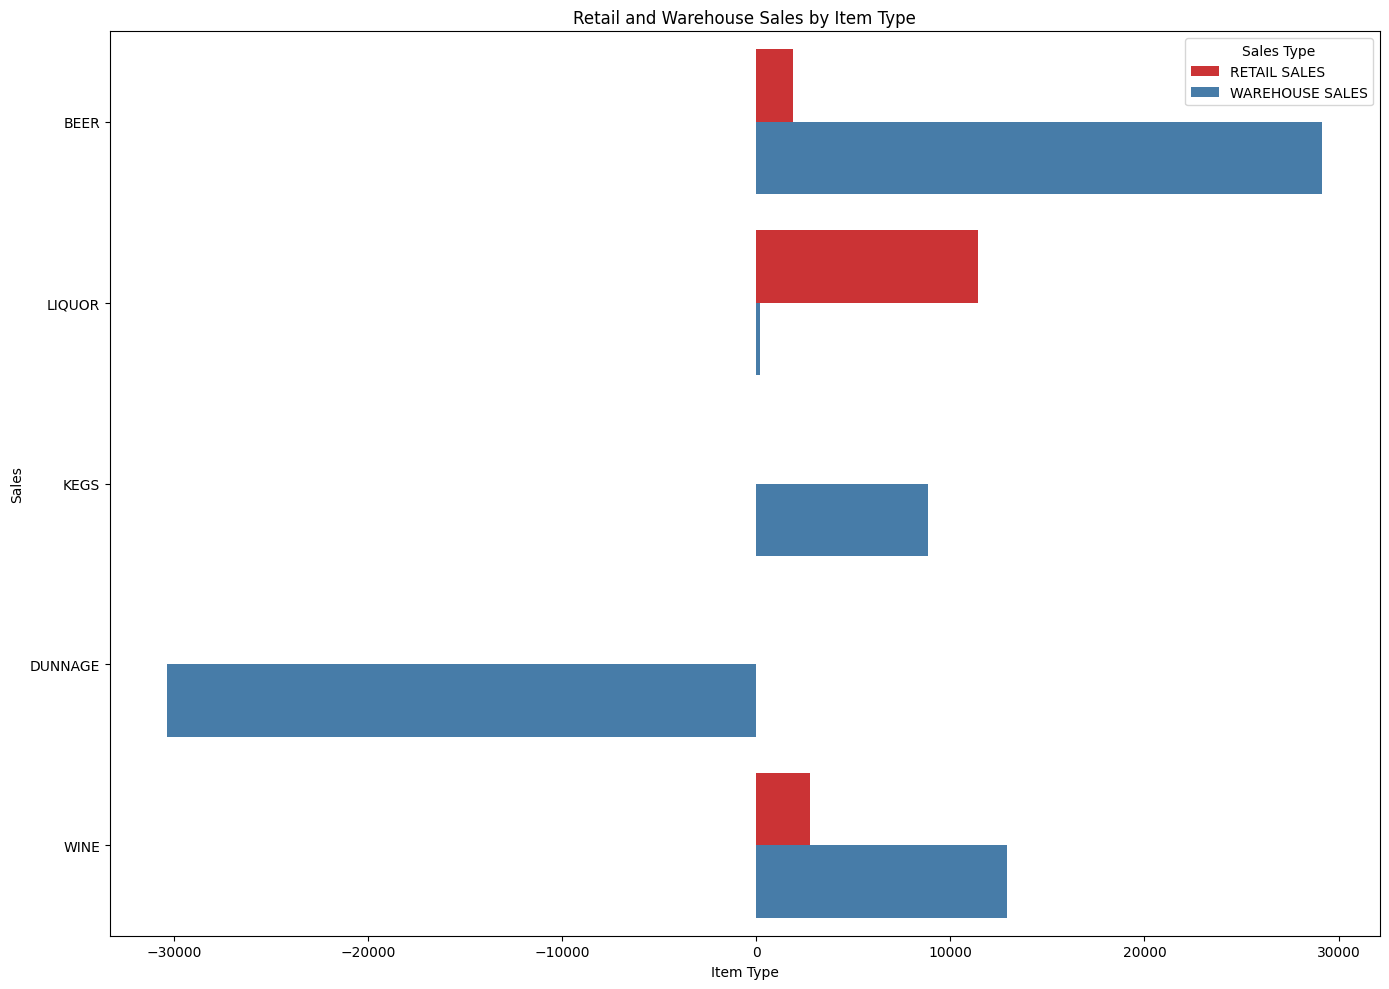

In [52]:
# Reshape data for plotting
item_sales_melted = significant_diff.melt(id_vars=['ITEM TYPE', 'SUPPLIER'], value_vars=['RETAIL SALES', 'WAREHOUSE SALES'], var_name='SALES TYPE', value_name='SALES')

# Plotting grouped bar chart for item types
plt.figure(figsize=(14, 10))
sns.barplot(data=item_sales_melted, x='SALES', y='ITEM TYPE', hue='SALES TYPE', palette='Set1', ci=None)
plt.title('Retail and Warehouse Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.legend(title='Sales Type')
plt.tight_layout()
plt.show()


<ipython-input-53-0470fdf5d4d9>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




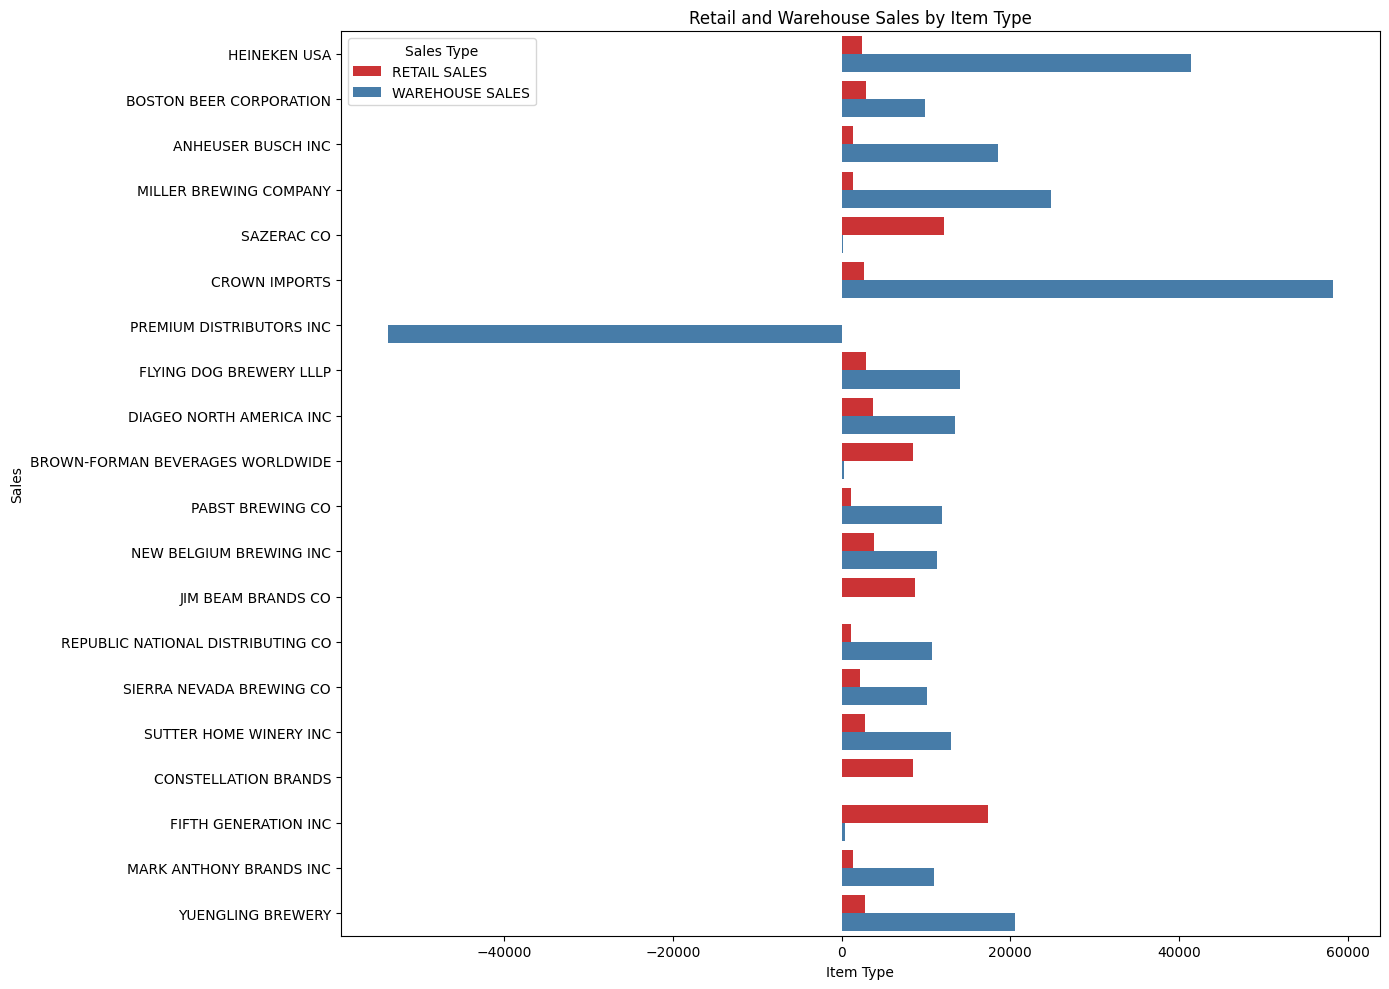

In [53]:
# Plotting grouped bar chart for item types
plt.figure(figsize=(14, 10))
sns.barplot(data=item_sales_melted, x='SALES', y='SUPPLIER', hue='SALES TYPE', palette='Set1', ci=None)
plt.title('Retail and Warehouse Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.legend(title='Sales Type')
plt.tight_layout()
plt.show()

# **6. Sales Transfer Analysis:**

In [54]:
# Filter retail transfer data
retail_transfers = df[df['RETAIL TRANSFERS'] > 0]

# Group by item and sum retail transfers
retail_transfers_summary = retail_transfers.groupby(['ITEM DESCRIPTION', 'ITEM TYPE'])['RETAIL TRANSFERS'].sum().reset_index()

# Sort by retail transfers to identify frequently transferred items
frequent_retail_transfers = retail_transfers_summary.sort_values(by='RETAIL TRANSFERS', ascending=False).head(10)

# Display frequently transferred items
print("Top 10 Frequently Transferred Items in Retail:")
print(frequent_retail_transfers)

Top 10 Frequently Transferred Items in Retail:
                                ITEM DESCRIPTION ITEM TYPE  RETAIL TRANSFERS
10680              TITO'S HANDMADE VODKA - 1.75L    LIQUOR          27889.33
3200                CORONA EXTRA LOOSE NR - 12OZ      BEER          24350.00
5614                    HEINEKEN LOOSE NR - 12OZ      BEER          16963.96
7549                 MILLER LITE 30PK CAN - 12OZ      BEER          14045.00
1780                          BUD LIGHT 30PK CAN      BEER          12120.00
1645                      BOWMAN'S VODKA - 1.75L    LIQUOR          11945.16
7545   MILLER LITE  HIGH GRAPHIC LOOSE NR - 12OZ      BEER          10243.00
10135            STELLA ARTOIS LOOSE NR - 11.2OZ      BEER           9995.00
3197                 CORONA EXTRA 2/12 NR - 12OZ      BEER           9312.46
8535                      PINNACLE VODKA - 1.75L    LIQUOR           8558.81


In [55]:
# Filter warehouse sales data
warehouse_sales = df[df['WAREHOUSE SALES'] > 0]

# Group by item and sum warehouse sales
warehouse_sales_summary = warehouse_sales.groupby(['ITEM DESCRIPTION', 'ITEM TYPE'])['WAREHOUSE SALES'].sum().reset_index()

# Sort by warehouse sales to identify frequently transferred items
frequent_warehouse_sales = warehouse_sales_summary.sort_values(by='WAREHOUSE SALES', ascending=False).head(10)

# Display frequently transferred items
print("\nTop 10 Frequently Transferred Items in Warehouse:")
print(frequent_warehouse_sales)



Top 10 Frequently Transferred Items in Warehouse:
                         ITEM DESCRIPTION ITEM TYPE  WAREHOUSE SALES
7836         CORONA EXTRA LOOSE NR - 12OZ      BEER        303160.83
7833          CORONA EXTRA 2/12 NR - 12OZ      BEER        247924.43
14011            HEINEKEN LOOSE NR - 12OZ      BEER        171950.21
14000             HEINEKEN 2/12 NR - 12OZ      BEER        154654.49
18893         MILLER LITE 30PK CAN - 12OZ      BEER        134486.40
7835           CORONA EXTRA 4/6 NR - 12OZ      BEER        125111.38
18996  MODELO ESPECIAL 24 LOOSE NR - 12OZ      BEER        116987.30
7831          CORONA EXTRA 18PK NR - 12OZ      BEER        100302.27
14003              HEINEKEN 4/6 NR - 12OZ      BEER         99406.15
4362                   BUD LIGHT 30PK CAN      BEER         96316.97


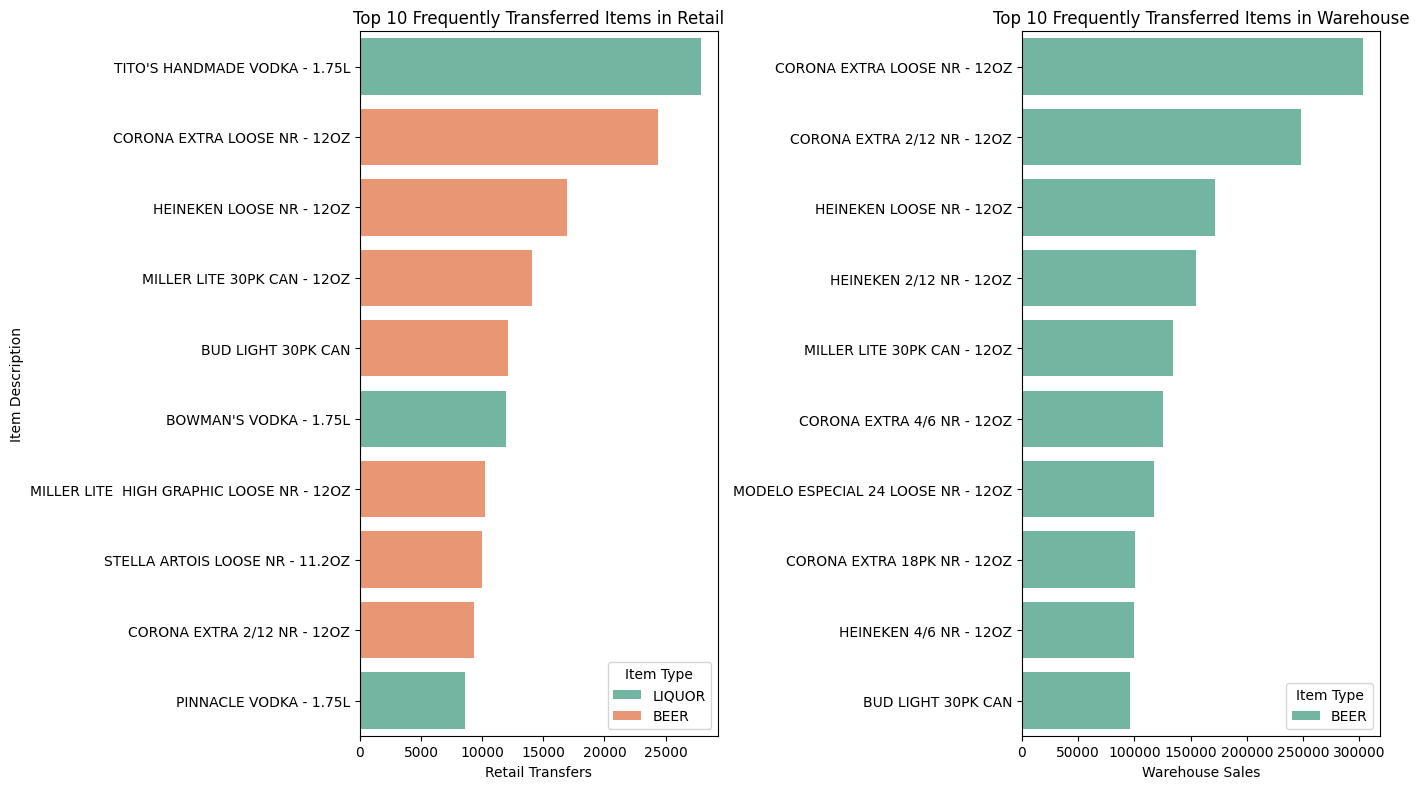

In [56]:
# Plotting
plt.figure(figsize=(14, 8))

# Plot for top retail transfers
plt.subplot(1, 2, 1)
sns.barplot(x='RETAIL TRANSFERS', y='ITEM DESCRIPTION', data=frequent_retail_transfers, hue='ITEM TYPE', dodge=False, palette='Set2')
plt.title('Top 10 Frequently Transferred Items in Retail')
plt.xlabel('Retail Transfers')
plt.ylabel('Item Description')
plt.legend(title='Item Type')
plt.tight_layout()

# Plot for top warehouse sales
plt.subplot(1, 2, 2)
sns.barplot(x='WAREHOUSE SALES', y='ITEM DESCRIPTION', data=frequent_warehouse_sales, hue='ITEM TYPE', dodge=False, palette='Set2')
plt.title('Top 10 Frequently Transferred Items in Warehouse')
plt.xlabel('Warehouse Sales')
plt.ylabel('')
plt.legend(title='Item Type')
plt.tight_layout()

plt.show()

# **7. Monthly Sales Performance:**

In [57]:
# Group by year and month, summing retail and warehouse sales
monthly_sales = df.groupby(['YEAR', 'MONTH'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

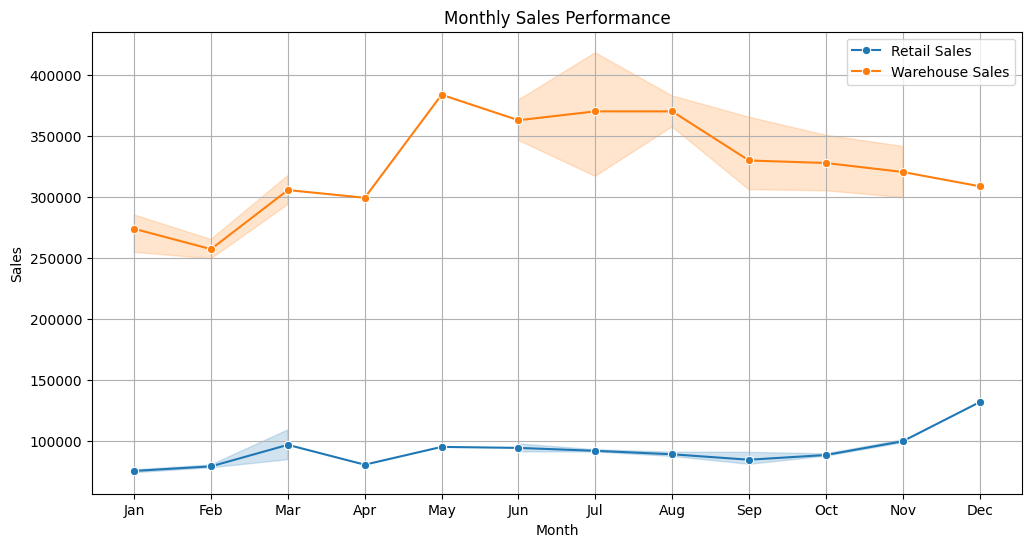

In [58]:
# Plotting monthly sales performance
plt.figure(figsize=(12, 6))
sns.lineplot(x='MONTH', y='RETAIL SALES', data=monthly_sales, marker='o', label='Retail Sales')
sns.lineplot(x='MONTH', y='WAREHOUSE SALES', data=monthly_sales, marker='o', label='Warehouse Sales')
plt.title('Monthly Sales Performance')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

# **8. Sales Correlation Analysis:**

In [59]:
# Select columns for correlation analysis
sales_columns = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
sales_data = df[sales_columns]

# Calculate correlation matrix
correlation_matrix = sales_data.corr()

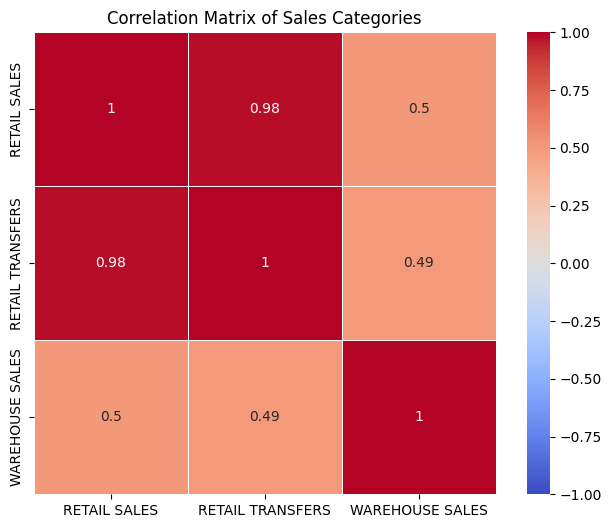

In [60]:
# Plotting correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
plt.title('Correlation Matrix of Sales Categories')
plt.show()